# Test other random stuff

c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\serialization.py:1006: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


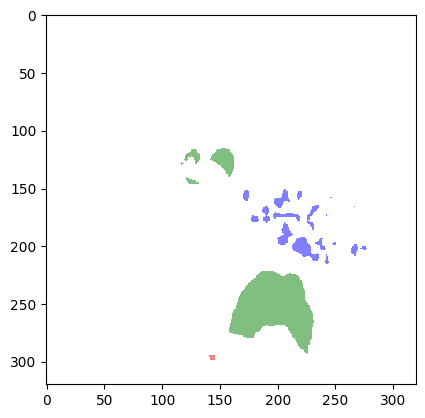

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


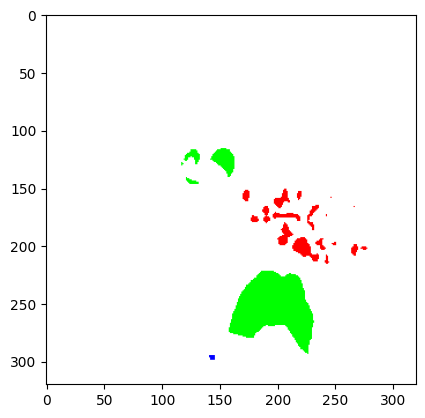

In [4]:
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import numpy as np


tensor = torch.load("misc\predictedMasks2.pt").state_dict()["0"]

plt.imshow(tensor[1].detach(), alpha=0.5, vmax=3, interpolation="nearest", cmap=ListedColormap(((0, 0, 0, 0), ("red"), ("green"), ("blue"))))
plt.show()

tensor2 = torch.load("misc\coloredTensor.pt").state_dict()["0"]
plt.imshow(tensor2.cpu().detach())
plt.show()